## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

In [12]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
%matplotlib inline

### Find no.of samples are there in training and test datasets

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
len(x_train)

60000

In [24]:
x_test.shape

(10000, 28, 28)

In [25]:
y_test.shape

(10000,)

In [26]:
y_train.shape

(60000,)

In [27]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [0]:
import skimage.io as io
import matplotlib.pyplot as plt

### Find dimensions of an image in the dataset

In [0]:
import skimage.io as io
import matplotlib.pyplot as plt

[]

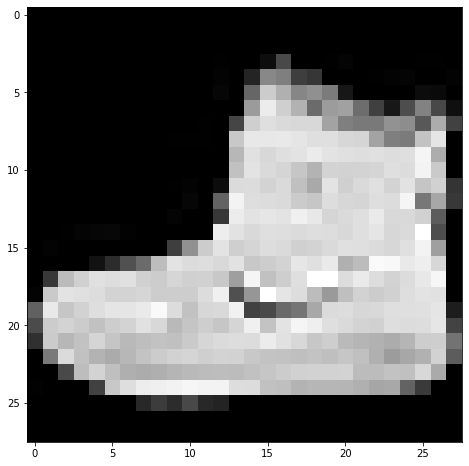

In [33]:
from keras.preprocessing.image import ImageDataGenerator
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.plot()

[]

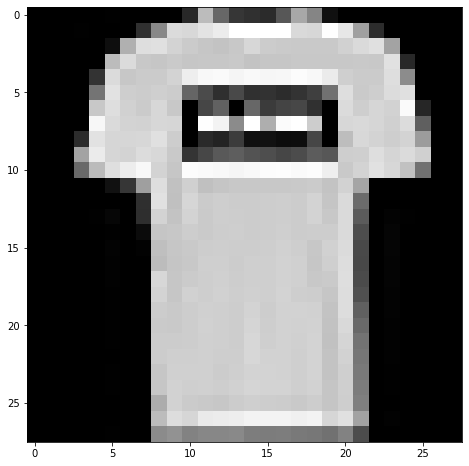

In [34]:
plt.imshow(x_train[1].squeeze(), cmap='gray')
plt.plot()

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:

from numpy import array
from numpy import argmax
from keras.utils import to_categorical

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [43]:
# Define Model
model_conv = Sequential()

# 1st Conv Layer
model_conv.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model_conv.add(Activation('relu'))

# 2nd Conv Layer
model_conv.add(Convolution2D(32, 3, 3))
model_conv.add(Activation('relu'))

# flatten into 2 fully connected layers (or Dense Layers)
model_conv.add(Flatten())
model_conv.add(Dense(128))
model_conv.add(Activation('relu'))
model_conv.add(Dense(10))
model_conv.add(Activation('softmax'))

# Loss and Optimizer
model_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model_conv.fit(x_train, y_train, batch_size=32, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 29s 487us/step - loss: 0.3763 - acc: 0.8656 - val_loss: 0.2941 - val_acc: 0.8956
Epoch 2/10
60000/60000 [==============================] - 21s 350us/step - loss: 0.2349 - acc: 0.9134 - val_loss: 0.2558 - val_acc: 0.9075
Epoch 3/10
60000/60000 [==============================] - 22s 359us/step - loss: 0.1749 - acc: 0.9346 - val_loss: 0.2409 - val_acc: 0.9142
Epoch 4/10
60000/60000 [==============================] - 24s 392us/step - loss: 0.1247 - acc: 0.9540 - val_loss: 0.2751 - val_acc: 0.9111
Epoch 5/10
60000/60000 [==============================] - 23s 379us/step - loss: 0.0850 - acc: 0.9686 - val_loss: 0.2894 - val_acc: 0.9170
Epoch 6/10
60000/60000 [==============================] - 23s 389us/step - loss: 0.0586 - acc: 0.9785 - val_loss: 0.3335 - val_acc: 0.9114
Epoch 7/10
600

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [45]:
# Define Model
model_conv_2 = Sequential()

# 1st Conv Layer
model_conv_2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model_conv_2.add(Activation('relu'))

# 2nd Conv Layer
model_conv_2.add(Convolution2D(32, 3, 3))
model_conv_2.add(Activation('relu'))

# Max Pooling
model_conv_2.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model_conv_2.add(Dropout(0.25))

# flatten into 2 fully connected layers (or Dense Layers)
model_conv_2.add(Flatten())
model_conv_2.add(Dense(128))
model_conv_2.add(Activation('relu'))
model_conv_2.add(Dense(10))
model_conv_2.add(Activation('softmax'))

# Loss and Optimizer
model_conv_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model_conv_2.fit(x_train, y_train, batch_size=32, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.3962 - acc: 0.8592 - val_loss: 0.3050 - val_acc: 0.8883
Epoch 2/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.2608 - acc: 0.9047 - val_loss: 0.2589 - val_acc: 0.9032
Epoch 3/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.2152 - acc: 0.9193 - val_loss: 0.2510 - val_acc: 0.9076
Epoch 4/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.1813 - acc: 0.9327 - val_loss: 0.2213 - val_acc: 0.9205
Epoch 5/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.1549 - acc: 0.9410 - val_loss: 0.2362 - val_acc: 0.9157
Epoch 6/10
60000/60000 [==============================] - 22s 359us/step - loss: 0.1305 - acc: 0.9506 - val_loss: 0.2189 - val_acc: 0.9236
Epoch 7/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.1144 - acc: 0.9572 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

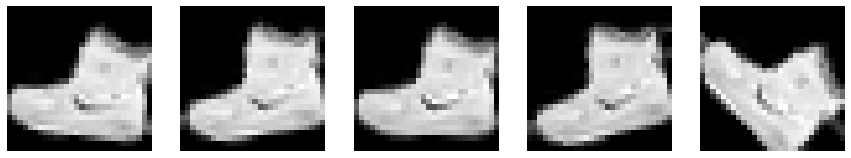

In [47]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [50]:
model_conv_2.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
   9/1875 [..............................] - ETA: 32s - loss: 2.6608 - acc: 0.5243

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 37s 20ms/step - loss: 0.4990 - acc: 0.8196 - val_loss: 0.2744 - val_acc: 0.9052
Epoch 2/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.3655 - acc: 0.8663 - val_loss: 0.2860 - val_acc: 0.9009
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3288 - acc: 0.8784 - val_loss: 0.2749 - val_acc: 0.9060
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3095 - acc: 0.8861 - val_loss: 0.2845 - val_acc: 0.8989
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2902 - acc: 0.8925 - val_loss: 0.2872 - val_acc: 0.9038
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2797 - acc: 0.8964 - val_loss: 0.2584 - val_acc: 0.9162
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2700 - acc: 0.9002 - val_loss: 0.2753 - val_acc: 0.9081
Epoch 8/10
1875/1875 [==============================] - 34s

###  Report the final train and validation accuracy

In [52]:
loss_and_metrics = model_conv_2.evaluate(x_train, y_train)
print('Test accuracy:', loss_and_metrics[1])

60000/60000 [==============================] - 5s 90us/step
Test accuracy: 0.9365666666666667


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(x_traina, y_traina), (x_testa, y_testa) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
data_gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
data_gen.fit(x_traina)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

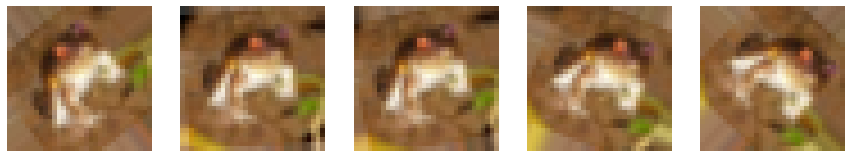

In [70]:
import numpy as np

gen = datagen.flow(x_traina[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow((gen.next().squeeze()).astype(np.uint8))
    plt.plot()
plt.show()